In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

ImportError: dlopen(/Users/kartikey/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/_arpack.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libquadmath.0.dylib
  Referenced from: <99DF54F4-B8F6-3977-BEB8-DE81BE05BDF7> /Users/kartikey/opt/anaconda3/lib/libgfortran.5.dylib
  Reason: tried: '/Users/kartikey/opt/anaconda3/lib/libquadmath.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/kartikey/opt/anaconda3/lib/libquadmath.0.dylib' (no such file), '/Users/kartikey/opt/anaconda3/lib/libquadmath.0.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/kartikey/opt/anaconda3/lib/libquadmath.0.dylib' (no such file), '/Users/kartikey/opt/anaconda3/lib/libquadmath.0.dylib' (no such file), '/Users/kartikey/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/../../../../../../../libquadmath.0.dylib' (no such file), '/Users/kartikey/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/../../../../../../../libquadmath.0.dylib' (no such file), '/Users/kartikey/opt/anaconda3/bin/../lib/libquadmath.0.dylib' (no such file), '/Users/kartikey/opt/anaconda3/bin/../lib/libquadmath.0.dylib' (no such file), '/usr/local/lib/libquadmath.0.dylib' (no such file), '/usr/lib/libquadmath.0.dylib' (no such file, not in dyld cache)

In [ ]:
df1 = pd.read_excel("dataset_capstone.xlsx")

In [3]:
df1 = df1.iloc[:400000,:]

In [4]:
df1.isna().sum()

Gender                     1666
State                         0
City                          0
Pincode                       0
DOB                      252210
Age                        1666
Marital Status             1666
Nominee Age                1666
Nominee Relation           1666
Income level               1666
Education level            1666
Occupation Type            1666
Parking Type                  0
Vehicle Class                 0
Manufacture Year              0
Policy Effective Date         0
Finance Status (Y/N)          0
Model_Name                    0
IC_name                       0
Created_date                  0
ExShowroom_Price              0
VehicleType                   0
Frame No                      3
Enngine No                    3
Renewdate                     0
Renewal_Status                0
dtype: int64

In [11]:
df1 = df1.drop(columns = ['DOB','Pincode','Nominee Age','ExShowroom_Price','Manufacture Year','Created_date','Age','Renewdate'])

KeyError: "['DOB', 'Pincode', 'Nominee Age', 'ExShowroom_Price', 'Manufacture Year', 'Created_date', 'Age', 'Renewdate'] not found in axis"

In [12]:
df1 = df1.dropna()

In [13]:
df1.columns

Index(['Gender', 'State', 'City', 'Marital Status', 'Nominee Relation',
       'Income level', 'Education level', 'Occupation Type', 'Parking Type',
       'Vehicle Class', 'Policy Effective Date', 'Finance Status (Y/N)',
       'Model_Name', 'IC_name', 'VehicleType', 'Frame No', 'Enngine No',
       'Renewal_Status'],
      dtype='object')

In [14]:
df1 = df1.astype(str)

In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Gender', 'State', 'City', 'Marital Status', 'Nominee Relation',
       'Income level', 'Education level', 'Occupation Type', 'Parking Type',
       'Vehicle Class', 'Policy Effective Date', 'Finance Status (Y/N)',
       'Model_Name', 'IC_name', 'VehicleType', 'Frame No', 'Enngine No',
       'Renewal_Status']
le = LabelEncoder()
# apply label encoder on categorical feature columns
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))

In [16]:
df1.head(2)

,Gender,State,City,Marital Status,Nominee Relation,Income level,Education level,Occupation Type,Parking Type,Vehicle Class,Policy Effective Date,Finance Status (Y/N),Model_Name,IC_name,VehicleType,Frame No,Enngine No,Renewal_Status
0,1,24,2651,2,8,4,2,9,0,1,0,1,69,1,0,86890,285563,0
1,1,27,1058,2,8,1,1,12,0,1,0,1,80,1,0,22802,187496,0


In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#Get independent variables
X = df1.drop(columns = ['Renewal_Status'])
#Get dependent variable
Renewal_Status_column = df1.loc[:,'Renewal_Status']
#Turn dependent variable into an array
y = Renewal_Status_column.values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_train.head()

,Gender,State,City,Marital Status,Nominee Relation,Income level,Education level,Occupation Type,Parking Type,Vehicle Class,Policy Effective Date,Finance Status (Y/N),Model_Name,IC_name,VehicleType,Frame No,Enngine No
277121,1,7,3230,2,8,1,1,9,1,1,19,1,69,6,0,51427,322396
46322,1,7,3006,2,8,3,2,4,0,1,63,1,80,2,0,21694,184501
181331,0,7,3425,2,15,0,1,16,0,1,10,1,69,6,0,124468,316414
8435,0,30,2182,2,6,4,3,4,0,1,1,1,69,2,0,132483,299287
332438,1,13,1343,2,2,1,2,19,0,1,25,1,32,6,0,187710,228069


In [22]:
pipe1 = Pipeline([('LR', LogisticRegression())])
pipe1.fit(X_train ,y_train)
print(accuracy_score(y_test, pipe1.predict(X_test)))

0.8852975510562717


In [23]:
pipe2 = Pipeline([('scaled' , StandardScaler()),
                 ('LR' ,LogisticRegression())])
pipe2.fit(X_train ,y_train)
print(accuracy_score(y_test, pipe2.predict(X_test)))

0.8852975510562717


In [29]:
print(classification_report(y_test,pipe2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     70529
           1       0.00      0.00      0.00      9138

    accuracy                           0.89     79667
   macro avg       0.44      0.50      0.47     79667
weighted avg       0.78      0.89      0.83     79667



In [30]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [32]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

In [34]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

XGBoostError: [17:47:19] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000139045b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000139146c36 xgboost::gbm::GBTree::ConfigureUpdaters() + 534
  [bt] (2) 3   libxgboost.dylib                    0x00000001391410fa xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 1130
  [bt] (3) 4   libxgboost.dylib                    0x0000000139163f9d xgboost::LearnerConfiguration::Configure() + 1229
  [bt] (4) 5   libxgboost.dylib                    0x00000001391642d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000013906101f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.7.dylib                      0x000000010db5cead ffi_call_unix64 + 85
  [bt] (7) 8   ???                                 0x000000030aa00fb0 0x0 + 13063163824



In [35]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

['scaledLR']: 0.884311 (0.001176)


/Users/kartikey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/kartikey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

['scaledLR', 'scaledKNN']: 0.871918 (0.001029)
['scaledLR', 'scaledKNN', 'scaledDT']: 0.797367 (0.002683)
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledMNB']: 0.855092 (0.001944)


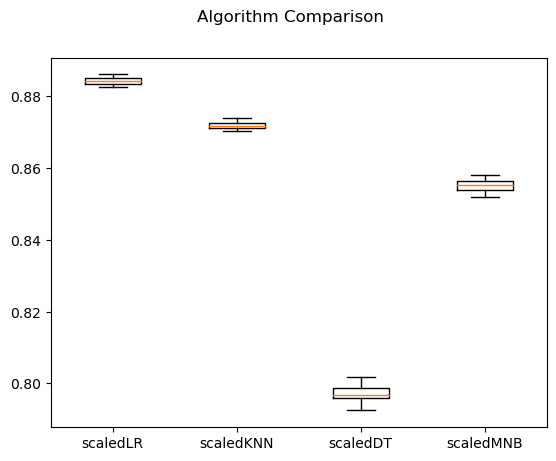

In [21]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
#pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , StandardScaler()),('MNB' ,GaussianNB())]))))

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42,shuffle = True)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()